* Import Libraries

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib
from imblearn.over_sampling import SMOTE

from sklearn.utils.class_weight import compute_class_weight
from sklearn.feature_selection import f_classif, chi2
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

* Read Dataset

In [11]:
DATA_PATH = os.path.join(os.getcwd(), '..', 'datasets', 'churn-data.csv')
df = pd.read_csv(DATA_PATH)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
# Adjust columns' name
df.columns = df.columns.str.strip().str.replace(' ', '_')

In [13]:
# Drop first 3 Features
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [15]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


* EDA

In [16]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [17]:
# Geography
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [18]:
# Gender
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [19]:
# Target
df['Exited'].value_counts(normalize=True)

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64

In [20]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [21]:
df['Tenure'].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0], dtype=int64)

* Data Visualization & Handling outliers

* Univariate Viz

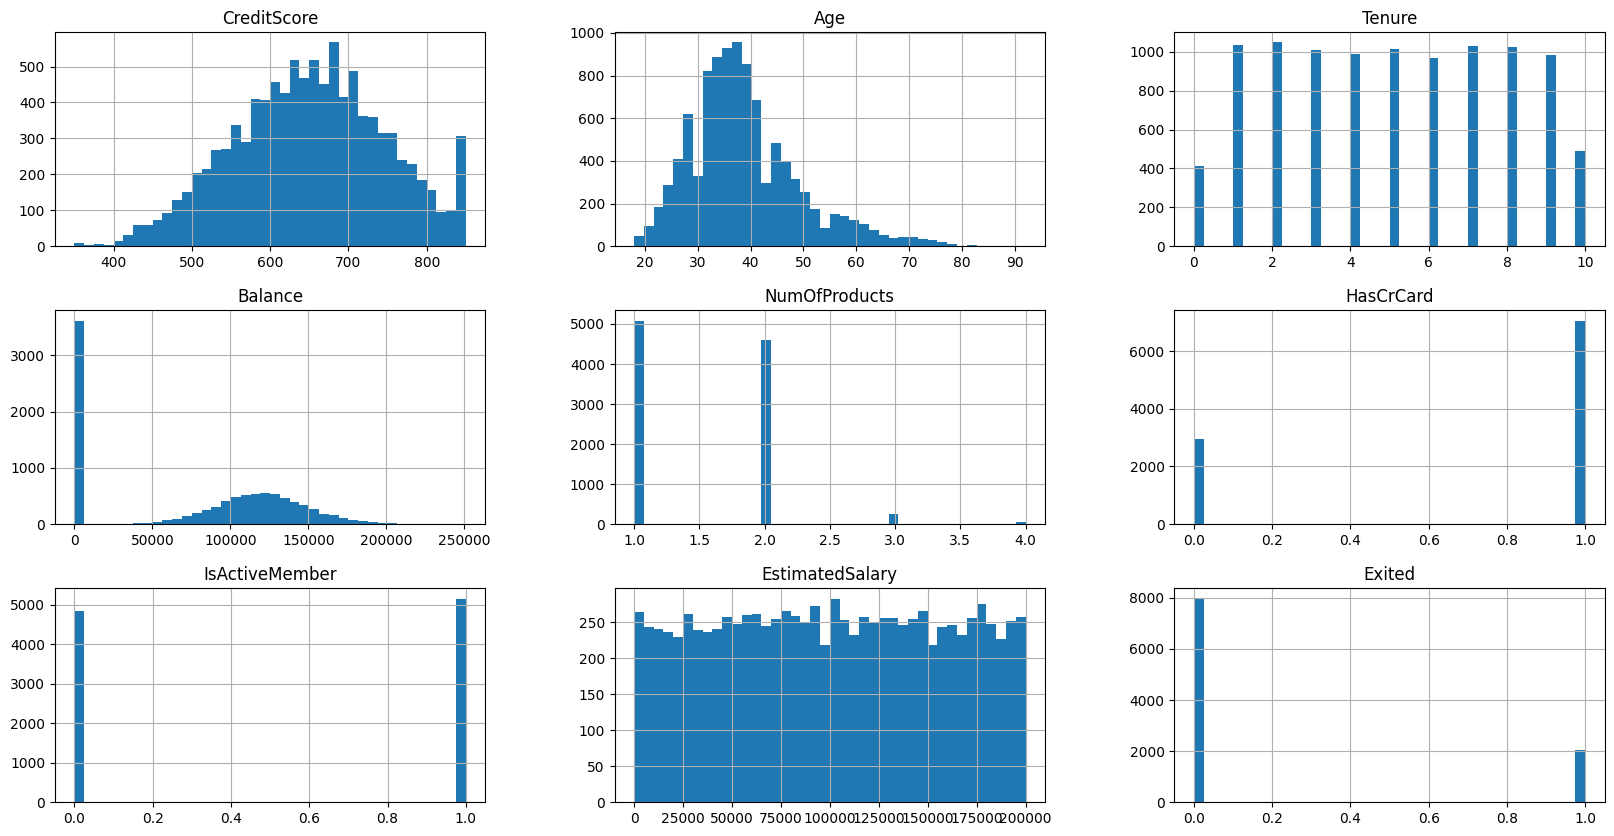

In [22]:
# Numerical Columns
df.hist(bins=40, figsize=(20,10))
plt.show()

In [23]:
df.drop(index=df[df['Age'] > 80].index.to_list(), axis=0, inplace=True)

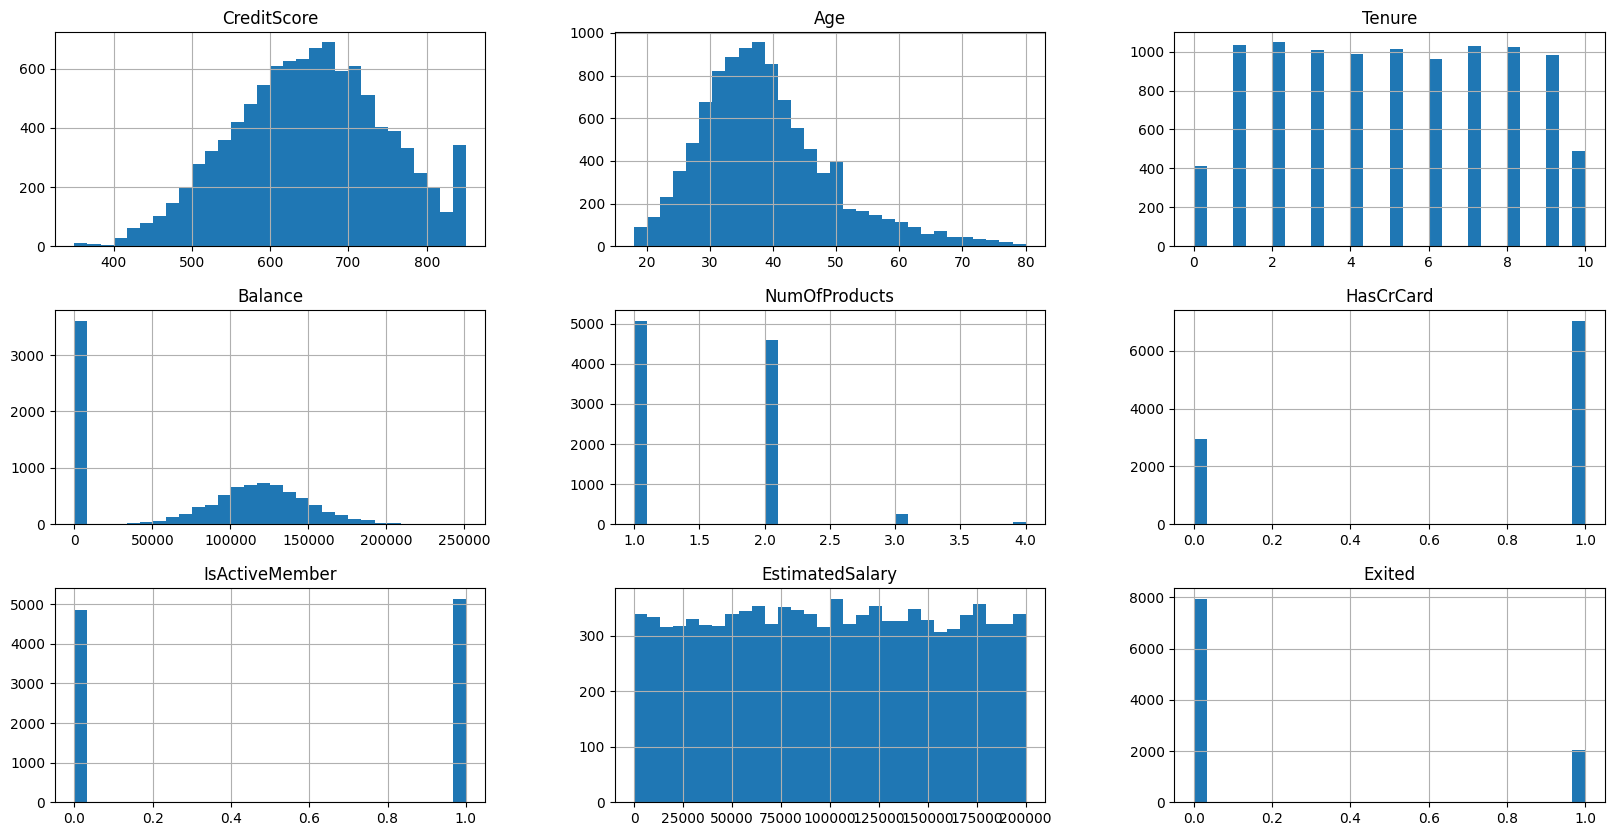

In [24]:
# Numerical Columns
df.hist(bins=30, figsize=(20,10))
plt.show()

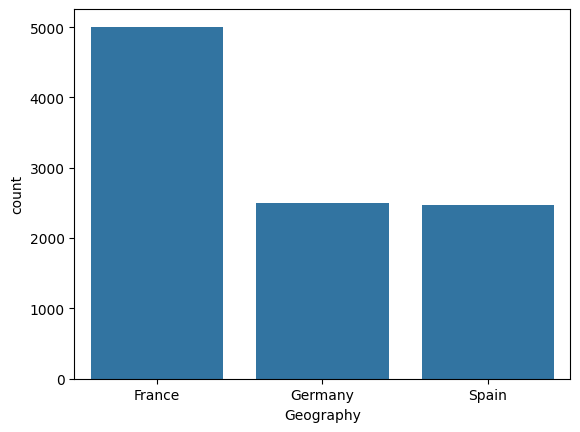

In [25]:
# countplot
sns.countplot(data=df, x='Geography' ,order=df['Geography'].value_counts().index.to_list())  ## title, xlabel, ylabel
plt.show()

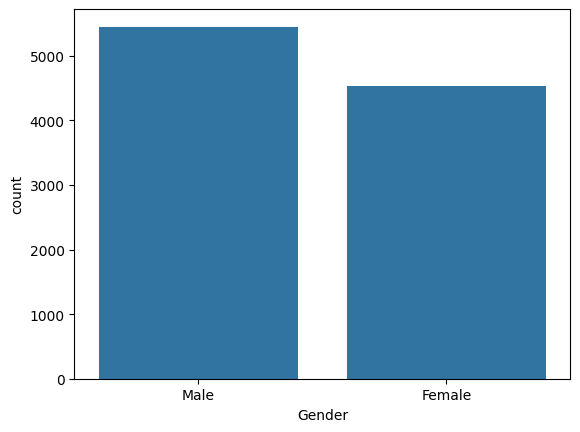

In [26]:
# counplot for Gender
sns.countplot(data=df, x='Gender', order=df['Gender'].value_counts().index.tolist())  ## title, xlabel, ylabel
plt.show()

<Axes: ylabel='EstimatedSalary'>

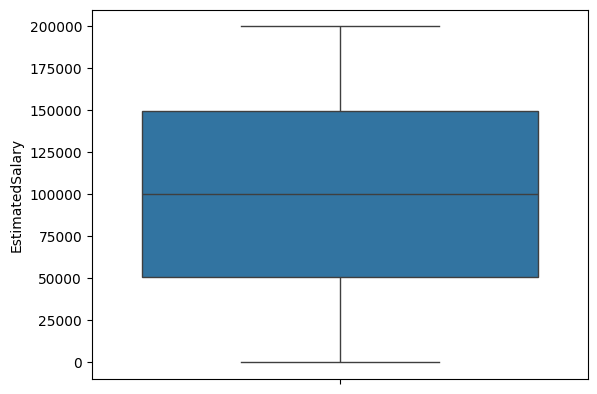

In [27]:
# Boxplot for (EstimatedSalary)
sns.boxplot(data=df, y='EstimatedSalary')

<Axes: xlabel='Exited', ylabel='count'>

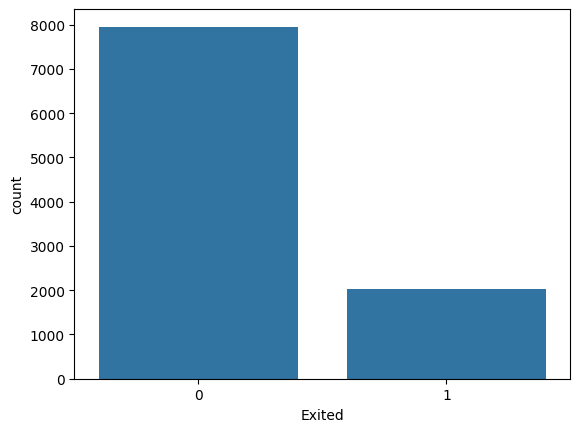

In [28]:
# countplot for Exited
sns.countplot(data=df, x='Exited')  ## title, xlabel, ylabel

*BiVariate Visualization

In [29]:
# Average salary per Gender
df[['Gender', 'EstimatedSalary']].groupby('Gender')['EstimatedSalary'].mean()

Gender
Female    100575.998277
Male       99671.901194
Name: EstimatedSalary, dtype: float64

<Axes: xlabel='Gender', ylabel='EstimatedSalary'>

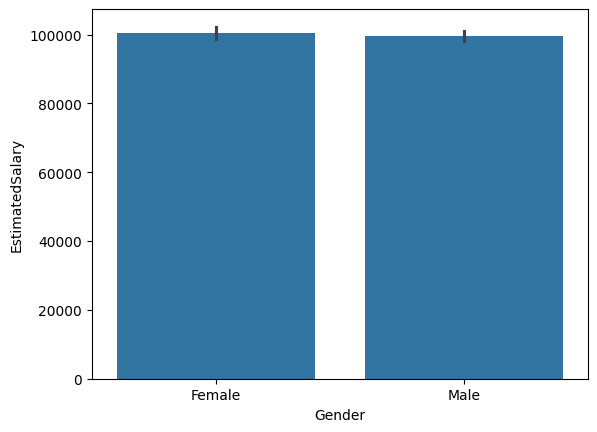

In [30]:
sns.barplot(data=df, y='EstimatedSalary', x='Gender', estimator='mean')

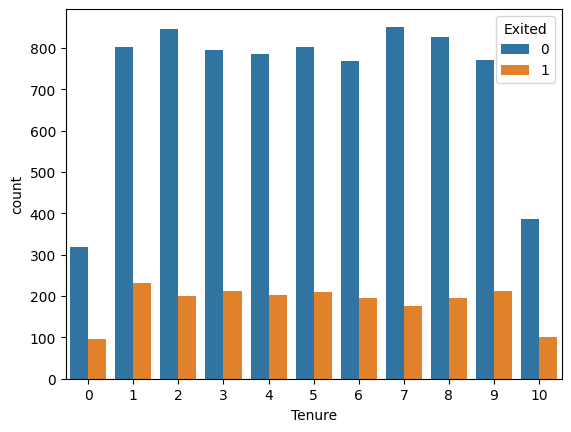

In [31]:
# Relation between Tenure and Exited
sns.countplot(data=df, x='Tenure', hue='Exited')  ## labels, title
plt.show()

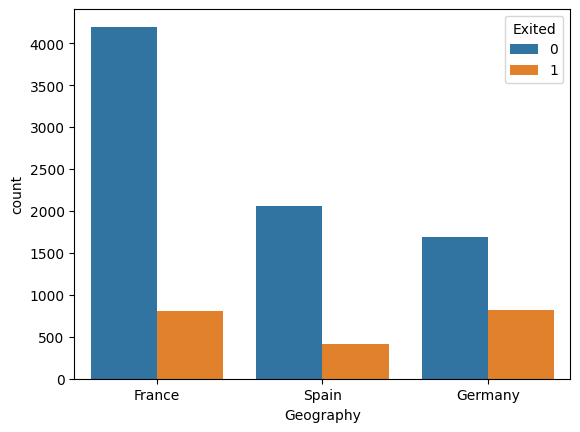

In [32]:
# Geography with Exited
sns.countplot(data=df,x='Geography', hue='Exited')  ## labels, titles
plt.show()

* Split to train & test

In [40]:
# to features & target 
X = df.drop(columns=['Exited'], axis=1)
y = df['Exited']

# Split to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45, shuffle=True, stratify=y)

# Check Shapes
print('X_train.shape \t', X_train.shape)
print('y_train.shape \t', y_train.shape)
print('***'*10)
print('X_test.shape \t', X_test.shape)
print('y_test.shape \t', y_test.shape)


X_train.shape 	 (7990, 10)
y_train.shape 	 (7990,)
******************************
X_test.shape 	 (1998, 10)
y_test.shape 	 (1998,)


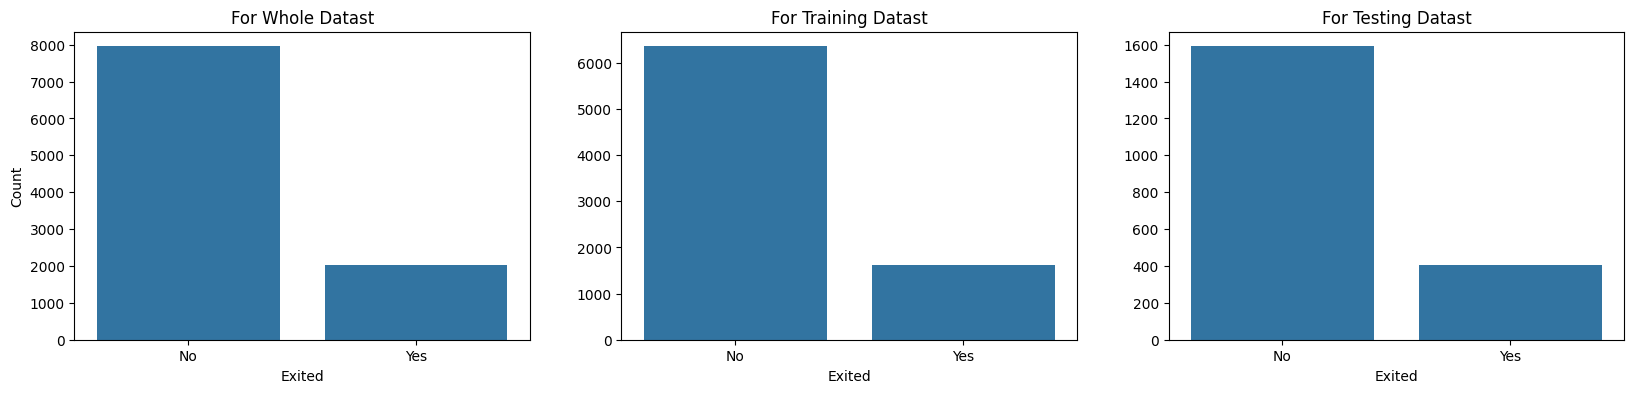

In [41]:
# plottting to check
fig, ax = plt.subplots(1, 3, figsize=(20, 4))

# Whole dataset
plt.sca(ax[0])
sns.countplot(x=y)
plt.title('For Whole Datast')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

# train
plt.sca(ax[1])
sns.countplot(x=y_train)
plt.title('For Training Datast')
plt.ylabel('')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

# test
plt.sca(ax[2])
sns.countplot(x=y_test)
plt.title('For Testing Datast')
plt.ylabel('')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

* Feature Selection & Preprocessing

In [42]:
# slice cols
num_cols = ['Age', 'CreditScore', 'Balance', 'EstimatedSalary']
categ_cols = ['Gender', 'Geography']
ready_cols = list(set(X_train.columns.tolist()) - set(num_cols) - set(categ_cols))

In [43]:
# Numerical cols (num_cols) & Target cols --> ANOVA
_, p_val = f_classif(X=X_train[num_cols], y=y_train)
p_val   # All features p-value less than 0.05 --> Reject H0 --> There is an asscociation

array([1.15359217e-149, 9.12989970e-002, 3.56368021e-025, 6.16127881e-001])

In [44]:
# Categorical cols (categ_cols) & Target cols --> chi2
_, p_val = chi2(X=OrdinalEncoder().fit_transform(X_train[categ_cols]), y=y_train)
p_val  # All features p-value less than 0.05 --> Reject H0 --> There is an asscociation

array([5.13986341e-10, 1.56448286e-03])

In [45]:
# Ready cols (ready_cols) & Target cols --> chi2
_, p_val = chi2(X=X_train[ready_cols], y=y_train)
p_val  # All features p-value less than 0.05 --> Reject H0 --> There is an asscociation

array([6.36015039e-02, 7.15759804e-22, 6.69284702e-01, 6.55133468e-02])

In [46]:
# Pipeline

# Numerical: num_cols --> Imputing using median, and standardscaler
# Categorical: categ_cols ---> Imputing using mode, and OHE
# Ready_cols ---> Imputing mode


# For Numerical
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# For Categorical
categ_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(sparse_output=False, drop='first'))
])

# For Ready cols
ready_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

# Combine all
preprocessor = ColumnTransformer(transformers=[
    ('numerical', num_pipeline, num_cols),
    ('categorical', categ_pipeline, categ_cols),
    ('ready', ready_pipeline, ready_cols)
])

# Apply to train and test
X_train_final = preprocessor.fit_transform(X_train)
X_test_final = preprocessor.transform(X_test)

In [47]:
# Check train
X_train_final.shape, y_train.shape

((7990, 11), (7990,))

In [48]:
# Check test
X_test_final.shape, y_test.shape

((1998, 11), (1998,))

* Deal with imbalanced dataset

In [49]:
# 1. prepare class_weights for solving imbalance dataset
vals_count = 1 - (np.bincount(y_train) / len(y_train))
vals_count = vals_count / sum(vals_count)

dict_weights = {}
for i in range(2):  # 2 classes (0, 1)
    dict_weights[i] = vals_count[i]

# to model
dict_weights

{0: 0.20387984981226537, 1: 0.7961201501877346}

In [50]:
# 2. Using SMOTE for over sampling
over = SMOTE(k_neighbors=5, sampling_strategy=0.7, random_state=45)
X_train_final_resampled, y_train_resampled = over.fit_resample(X_train_final, y_train)

In [51]:
# Create folder for the models
MODELS_FOLDER_PATH = os.path.join(os.getcwd(), '..', 'models')
os.makedirs(MODELS_FOLDER_PATH, exist_ok=True)

In [52]:
# dump the preprocessor
joblib.dump(preprocessor, os.path.join(MODELS_FOLDER_PATH, 'preprocessor.pkl'))

['c:\\Users\\youse\\Desktop\\churn_project\\notebooks\\..\\models\\preprocessor.pkl']

------------------

* Building Models


1. Using Logistic Regression

In [ ]:
# 1. Using logisitic -- without considering the imabalancing data
log_clf = LogisticRegression(C=1.5)
log_clf.fit(X_train_final, y_train)

# Predict and evaluate
y_pred_train_log = log_clf.predict(X_train_final)
y_pred_test_log = log_clf.predict(X_test_final)

# Using f1_score
score_train_log = f1_score(y_train, y_pred_train_log)
score_test_log = f1_score(y_test, y_pred_test_log)


print(f'The f1_score using Logistic model for Training Dataset is {score_train_log*100:.3f}')
print(f'The f1_score using Logistic model for Testing Dataset is {score_test_log*100:.3f}')

In [ ]:
# 2. Using logisitic -- with considering the imabalancing data using class_weights
log_clf = LogisticRegression(C=1.5, class_weight=dict_weights)
log_clf.fit(X_train_final, y_train)

# Predict and evaluate
y_pred_train_log = log_clf.predict(X_train_final)
y_pred_test_log = log_clf.predict(X_test_final)

# Using f1_score
score_train_log = f1_score(y_train, y_pred_train_log)
score_test_log = f1_score(y_test, y_pred_test_log)

print(f'The f1_score using Logistic model for Training Dataset with class_weigths is {score_train_log*100:.3f}')
print(f'The f1_score using Logistic model for Testing Dataset with class_weigths is {score_test_log*100:.3f}')

The f1_score using Logistic model for Training Dataset with class_weigths is 49.814
The f1_score using Logistic model for Testing Dataset with class_weigths is 49.915


In [55]:
# 3. Using logisitic -- with considering the imabalancing data using oversampled data (SMOTE)
log_clf = LogisticRegression(C=1.5)
log_clf.fit(X_train_final_resampled, y_train_resampled)

# Predict and evaluate
y_pred_train_log = log_clf.predict(X_train_final)
y_pred_test_log = log_clf.predict(X_test_final)

# Using f1_score
score_train_log = f1_score(y_train, y_pred_train_log)
score_test_log = f1_score(y_test, y_pred_test_log)

print(f'The f1_score using Logistic model for Training Dataset with SMOTE is {score_train_log*100:.3f}')
print(f'The f1_score using Logistic model for Testing Dataset with SMOTE is {score_test_log*100:.3f}')

The f1_score using Logistic model for Training Dataset with SMOTE is 49.757
The f1_score using Logistic model for Testing Dataset with SMOTE is 50.420


<Axes: >

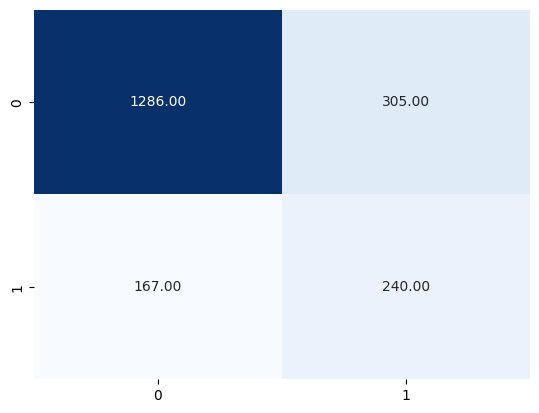

In [56]:
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=y_pred_test_log), cmap='Blues', cbar=False, annot=True, fmt='.2f')

In [57]:
# clf report
print(classification_report(y_test, y_pred_test_log))

              precision    recall  f1-score   support

           0       0.89      0.81      0.84      1591
           1       0.44      0.59      0.50       407

    accuracy                           0.76      1998
   macro avg       0.66      0.70      0.67      1998
weighted avg       0.79      0.76      0.78      1998



* RandomForest

In [58]:
# Using RF -- With class_weights
forst_clf = RandomForestClassifier(n_estimators=150, max_depth=5, random_state=45, class_weight=dict_weights)
forst_clf.fit(X_train_final, y_train)

# Predict and evaluate
y_pred_train_forest = forst_clf.predict(X_train_final)
y_pred_test_foerst = forst_clf.predict(X_test_final)

# Using f1_score
score_train_forest = f1_score(y_train, y_pred_train_forest)
score_test_forest = f1_score(y_test, y_pred_test_foerst)

print(f'The f1_score using RF model for Training Dataset with class_weights is {score_train_forest*100:.3f}')
print(f'The f1_score using RF model for Testing Dataset with class_weights is {score_test_forest*100:.3f}')

The f1_score using RF model for Training Dataset with class_weights is 60.030
The f1_score using RF model for Testing Dataset with class_weights is 57.988


In [60]:
# Using RF -- With SMOTE
forest_clf = RandomForestClassifier(n_estimators=150, max_depth=5, random_state=45)
forest_clf.fit(X_train_final_resampled, y_train_resampled)

# Predict and evaluate
y_pred_train_forest = forest_clf.predict(X_train_final)
y_pred_test_forest = forest_clf.predict(X_test_final)

# Using f1_score
score_train_forest = f1_score(y_train, y_pred_train_forest)
score_test_forest = f1_score(y_test, y_pred_test_forest)

print(f'The f1_score using RF model for Training Dataset with SMOTE is {score_train_forest*100:.3f}')
print(f'The f1_score using RF model for Testing Dataset with SMOTE is {score_test_forest*100:.3f}')

The f1_score using RF model for Training Dataset with SMOTE is 62.247
The f1_score using RF model for Testing Dataset with SMOTE is 59.922


* RF-Tuning

In [61]:
forest_base_clf = RandomForestClassifier(n_estimators=150, max_depth=5, random_state=45, class_weight=dict_weights)

# Your space to search
params_best_grid = {
            'n_estimators': np.arange(50, 400, 50),
            'max_depth': np.arange(6, 10, 2)
}

grid_search_forest = GridSearchCV(estimator=forest_base_clf, param_grid=params_best_grid, 
                                  cv=5, n_jobs=-1, verbose=4, scoring='f1')
grid_search_forest.fit(X_train_final, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight={0: 0.20387984981226537,
                                                            1: 0.7961201501877346},
                                              max_depth=5, n_estimators=150,
                                              random_state=45),
             n_jobs=-1,
             param_grid={'max_depth': array([6, 8]),
                         'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350])},
             scoring='f1', verbose=4)

In [62]:
# The best score according to your scoring & The best combination of what you search in
grid_search_forest.best_score_, grid_search_forest.best_params_

(0.6125659692442756, {'max_depth': 8, 'n_estimators': 350})

In [63]:
# The forest after tuning
forest_tuned = grid_search_forest.best_estimator_

# Predict and evaluate
y_pred_train_forest_tuned = forest_tuned.predict(X_train_final)
y_pred_test_forest_tuned = forest_tuned.predict(X_test_final)

# Using f1_score
score_train_forest_tuned = f1_score(y_train, y_pred_train_forest_tuned)
score_test_forest_tuned = f1_score(y_test, y_pred_test_forest_tuned)

print(f'The f1_score using tuned RF model for Training Dataset with class_weigths is {score_train_forest_tuned*100:.3f}')
print(f'The f1_score using tuned RF model for Testing Dataset with class_weigths is {score_test_forest_tuned*100:.3f}')

The f1_score using tuned RF model for Training Dataset with class_weigths is 68.543
The f1_score using tuned RF model for Testing Dataset with class_weigths is 61.656


In [64]:
# Downlaod it if you are satisifed with the above model
joblib.dump(forest_tuned, os.path.join(MODELS_FOLDER_PATH, 'forest_tuned.pkl'))

['c:\\Users\\youse\\Desktop\\churn_project\\notebooks\\..\\models\\forest_tuned.pkl']

In [65]:
forest_tuned.feature_importances_

array([0.37039264, 0.04922873, 0.09472852, 0.05141598, 0.02043113,
       0.05854321, 0.00680025, 0.02760855, 0.06627423, 0.00661445,
       0.24796231])

In [66]:
# Get the features out from the preprocessor
features_after = [name.split('__')[1] for name in preprocessor.get_feature_names_out()]
features_after

['Age',
 'CreditScore',
 'Balance',
 'EstimatedSalary',
 'Gender_Male',
 'Geography_Germany',
 'Geography_Spain',
 'Tenure',
 'IsActiveMember',
 'HasCrCard',
 'NumOfProducts']

In [67]:
# Feature Importance from RF
forest_tuned_importance = pd.DataFrame({'feature': features_after, 
                              'importance': forest_tuned.feature_importances_}).sort_values('importance', ascending=False)
forest_tuned_importance

,feature,importance
0,Age,0.370393
10,NumOfProducts,0.247962
2,Balance,0.094729
8,IsActiveMember,0.066274
5,Geography_Germany,0.058543
3,EstimatedSalary,0.051416
1,CreditScore,0.049229
7,Tenure,0.027609
4,Gender_Male,0.020431
6,Geography_Spain,0.006800
